## Free fall Simulation
This simulation takes a sample of 100 heights ranging from 5 meters to 500 meters and applies the equation of free fall to obtain a time estimate.

It then plots a graph of time vs height for clarity.

*Note: This notebook is written with modularity in mind, so there will be a lot of functions.*

#### Dependencies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

# Typings
from typing import Any
import numpy.typing as npt

#### Constants:

In [2]:
GRAVITY: float = 9.81
HEIGHT: float = 5.0
BASE: float = 5.0

### Free fall

![Object on free fall without air resistance](./assets/images/img-free-fall.png)

Note that,

$$F_g = mg$$

Where,

$F_g$ = Force acted upon by gravity on the object

$m$ = Mass of the object

$g$ = 9.81 $m/s$ (Value of gravity on Earth)

In [3]:
def calc_pos(prev_pos: float, v: float, t: float) -> float:
    pos: float = prev_pos - (v * t)
    return pos

In [4]:
def calc_vel(t: float) -> float:
    v: float = GRAVITY * t
    return v

In [5]:
def get_height_time_arr(time_increment: float = 0.5, max_height: float = 25.0) -> tuple[npt.NDArray | npt.NDArray[Any], npt.NDArray | npt.NDArray[Any]]:
    pos_arr = np.array([])
    time_arr = np.array([])

    height: float = max_height
    time: float = 0.0
    velocity: float = 0.0

    while height >= 0:
        velocity = calc_vel(time)
        height = calc_pos(height, velocity, time)
        pos_arr = np.append(pos_arr, height)
        time_arr = np.append(time_arr, time)
        time += time_increment
    
    return (pos_arr, time_arr)


In [6]:
def get_time_from_height(time_increment: float = 0.5, max_height: float = 25.0) -> float:
    height: float = max_height
    time: float = 0.0
    velocity: float = 0.0

    while height >= 0:
        velocity = calc_vel(time)
        height = calc_pos(height, velocity, time)
        time += time_increment
    
    return time

In [7]:
def plot_two_val(x: Any, y: Any, x_label: str, y_label: str) -> None:
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

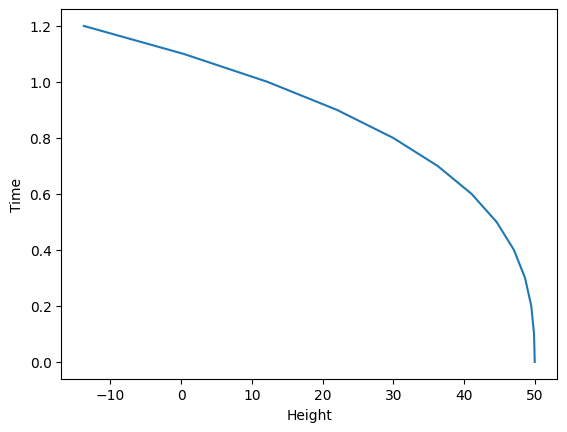

In [8]:
# For one iteration:
height_list, time_list = get_height_time_arr(0.1, 50)
plot_two_val(height_list, time_list, "Height", "Time")

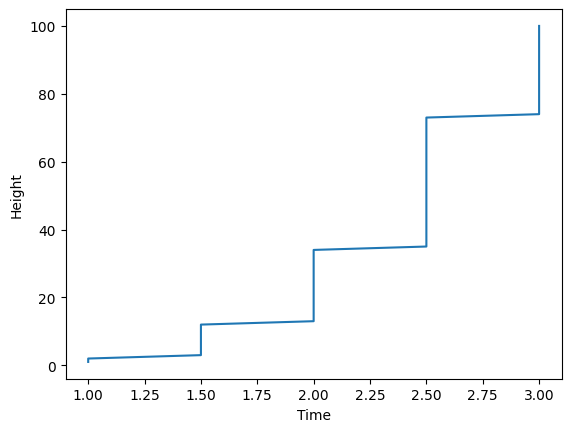

In [9]:
# For varying heights in a range of 5 to 500:
initial_height: float = 1

height_list: npt.NDArray = np.array([])
time_list = np.array([])

for i in range(1, 101):
    scaled_height: float = initial_height * i
    height_list = np.append(height_list, scaled_height)

    ground_time = get_time_from_height(0.5, scaled_height)
    time_list = np.append(time_list, ground_time)
 
plot_two_val(time_list, height_list, "Time", "Height")

### Object sliding down a banked slope

![Object sliding down inclined plane](./assets/images/img-inclined-plane-forces.png)

Also, note that:

From Newton's second law and taking a coordiante system with the x-axis parallel to the slope, we get:

$$mx''(t) = mg\cdot sin(\theta)$$

Then,

$$x(t) = \frac{1}{2}g\cdot sin(\theta)t^2$$

Also,

$$sin(\theta) = \frac{perpendicular (p)}{hypotenuse (h)} = \frac{p}{h}$$ 

Now, we're looking for time t = $T$ such that  $x(T) = h$,

$$h = \frac{1}{2}g\frac{p}{h}T^2$$

Finally, we derive an equation for calculating time $T$,

$$T=h\sqrt{\frac{2}{gp}}$$

In [10]:
def rad_to_deg(value: float) -> float:
    return value * 180 / np.pi

def deg_to_rad(value: float) -> float:
    return value * (np.pi /180)

def hor_weight_comp(m: float, g: float, angle: float) -> float:
    return m * g * np.cos(angle)

def ver_weight_comp(m: float, g: float, angle: float) -> float:
    return m * g * np.sin(angle)

def calc_hypotenuse(p: float, b: float) -> float:
    return pow(pow(p, 2) + pow(b, 2), 0.5)

def calc_angle(p: float, b: float) -> float:
    return rad_to_deg(np.arctan(p/b))

def calc_time(h: float, g: float, p: float) -> float:
    return h * np.sqrt(2/(g * p))

# Initial values (Using the pythagorean triplets: 3,4,5) of the inclined plane:
perpendicular: float = 4.0
base: float = 3.0
hypotenuse: float = 5.0
friction: float = 0.0

# Initial values of the object:
mass: float = 1.0 # In kg

In [11]:
def create_inclined_plane(perpendicular: float = 4.0, h: float = 3.0, angle: float = 30.0, time: float = 1.0) -> None:
    h = calc_hypotenuse(perpendicular, base)
    # Creating the figure and the axes for the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim(-1, h + 1)
    ax.set_ylim(-1, h + 1)
    ax.axhline(0, color = "blue")

    # Drawing the time circle
    angles = np.linspace(0, np.pi / 2, 100) # Evenly space apart the points in the inscribed circle
    x_coor = h - h * np.cos(angles)
    y_coor = h * np.sin(angles)
    ax.plot(x_coor, y_coor, color = "red", linestyle = "dotted")

    # Creating the line for the inclined plane hypotenuse representation
    line = None
    theta: float = angle * np.pi / 180

    # Drawing the line
    x_line = h - h * np.cos(theta)
    y_line = h * np.sin(theta)

    # Drawing the line
    line = ax.plot([h, x_line], [0, y_line], 'k', lw = 2)[0]
    time_marker = ax.annotate(f'Time: {time}s', xy = (h, h), xytext = (h / 2 - 1, h + 1.25))

    # Creating the marker and the inclined plane
    ax.fill_between([h, h - h * np.cos(theta)], [0, h * np.sin(theta)], color = "gray", alpha = 0.25, hatch = "///")
    marker = ax.plot(x_line, y_line, marker = 'o', markersize=10, markeredgecolor = "black", markerfacecolor="blue")

    plt.show()

#### Calculating increment of hypotenuse on increment of perpendicular

From the Pythagorean theorem,

$$h^2 = p^2 + b^2$$

For any increment $k\in \mathbb{R}$, let the new perpendicular be $p' = p + k$,

$$h'^2 = p'^2 + b'^2$$
$$h' = \sqrt{p'^2 + b'^2}$$
$$h' = \sqrt{(p + k)^2 + b'^2}$$

5 3 59.03624346792648 1.1774296025280135


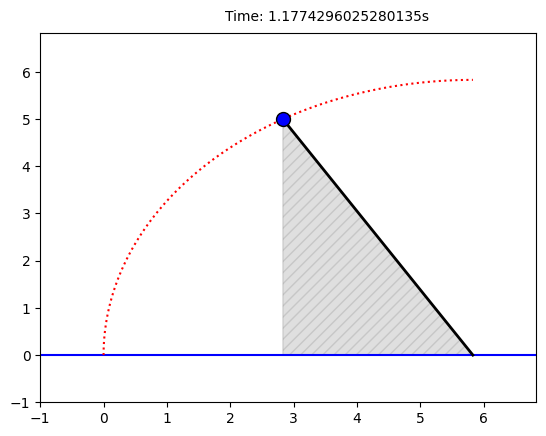

10 6 59.03624346792648 1.6651369126346796


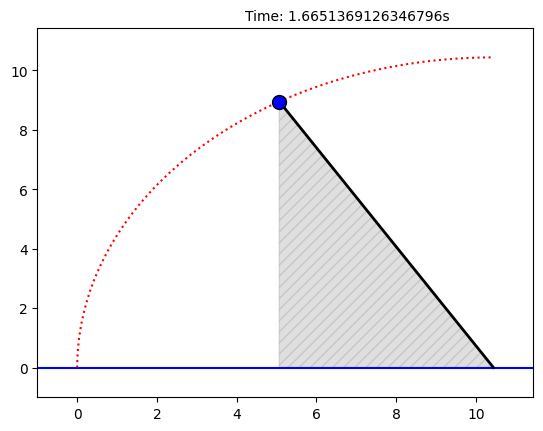

15 9 59.03624346792648 2.039367893914148


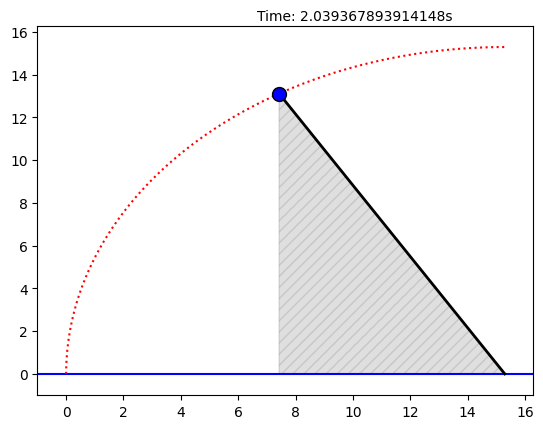

In [12]:
perpendicular_list = [5, 10, 15]
base_list = [3, 6, 9]

for i in range(len(perpendicular_list)):
    time: float = calc_time(calc_hypotenuse(perpendicular_list[i], base_list[i]), GRAVITY, perpendicular_list[i])
    angle: float = calc_angle(perpendicular_list[i], base_list[i])
    print(perpendicular_list[i], base_list[i], angle, time)
    create_inclined_plane(perpendicular_list[i], base_list[i], angle, time)

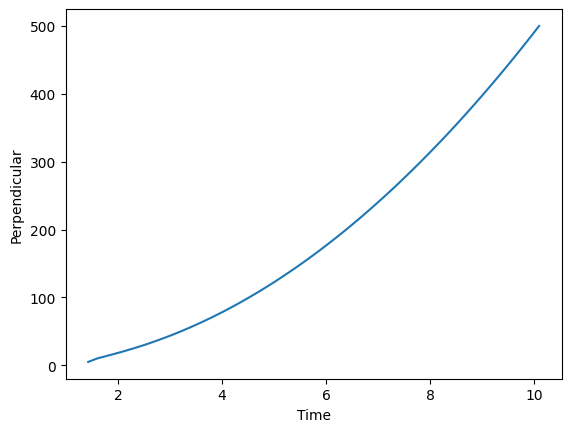

In [13]:
time_list: list[float] = []
perpendicular_list: list[float] = []
BASE: float = 5.0
PERPENDICULAR: float = 5.0

for i in range(100):
    h: float = calc_hypotenuse(PERPENDICULAR * (i + 1), BASE)
    perpendicular_list.append(PERPENDICULAR * (i + 1))
    time: float = calc_time(h, GRAVITY, PERPENDICULAR * (i + 1))
    time_list.append(time)

plot_two_val(time_list, perpendicular_list, "Time", "Perpendicular")

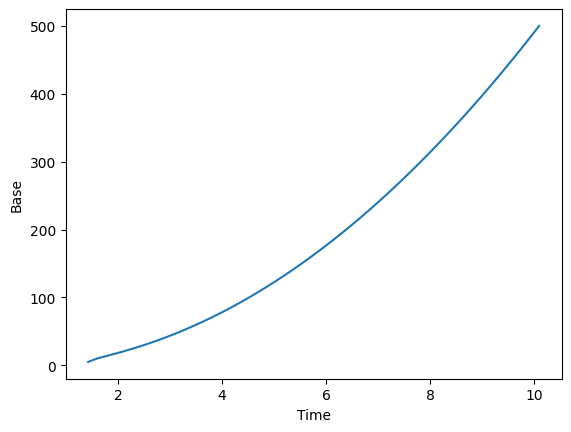

In [14]:
time_list: list[float] = []
base_list: list[float] = []
BASE: float = 5.0
PERPENDICULAR: float = 5.0

for i in range(100):
    h: float = calc_hypotenuse(BASE * (i + 1), BASE)
    base_list.append(BASE * (i + 1))
    time: float = calc_time(h, GRAVITY, BASE * (i + 1))
    time_list.append(time)

plot_two_val(time_list, base_list, "Time", "Base")

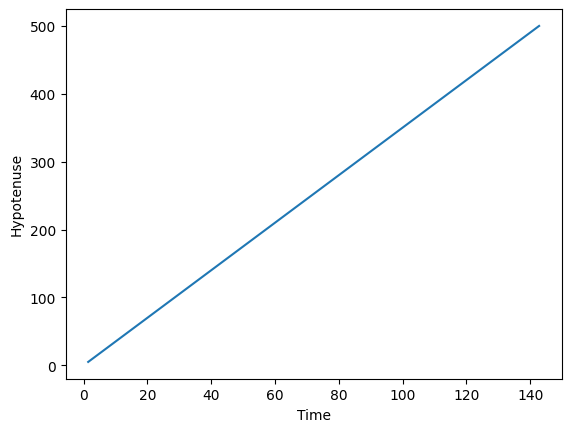

In [15]:
time_list: list[float] = []
hypotenuse_list: list[float] = []
HYPOTENUSE: float = 5.0
ANGLE: float = deg_to_rad(30.0) # In radians

for i in range(100):
    hypotenuse_list.append(HYPOTENUSE * (i + 1))
    time: float = calc_time(HYPOTENUSE * (i + 1), GRAVITY, HYPOTENUSE * np.sin(ANGLE))
    time_list.append(time)

plot_two_val(time_list, hypotenuse_list, "Time", "Hypotenuse")

#### Sliding down a quarter circle path:

![Object sliding down inclined plane](./assets/images/img-ball-rolling-down-circle.png)

#### Derivation of the formula for time of sliding down a quarter circle path:

By the law of conservation of energy,

$$mgr = \frac{1}{2}mv^2$$
$$\sqrt{2gh} = v$$

Also,

$$v = \frac{distance}{time} = \frac{\frac{1}{4}circumference}{time} = \frac{\pi * radius}{2*time}$$

Then,

$$\sqrt{2gh} = \frac{\pi * r}{2t}$$
$$t = \frac{\pi * r}{2\sqrt{2gr}} = \frac{\pi * \sqrt{r}}{2\sqrt{2g}}$$
$$t = \frac{\pi}{2} * \sqrt{\frac{r}{2g}}$$

In [16]:
def time_quarter_circle_path(r: float) -> float:
    return (np.pi / 2) * np.sqrt(r/(2 * GRAVITY))

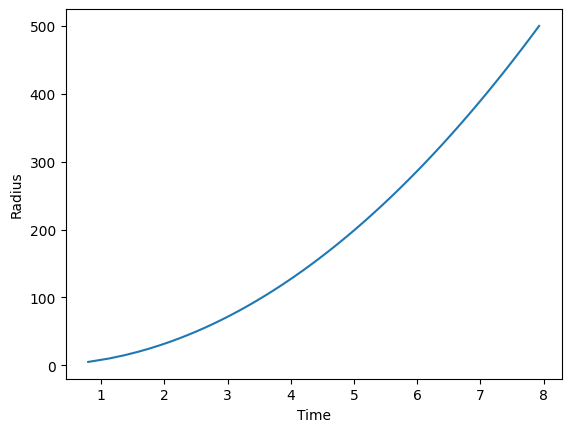

In [17]:
radius_list: list[float] = []
time_list: list[float] = []
initial_radius: float = 5.0

for i in range(100):
    radius_list.append(initial_radius * (i + 1))
    time_list.append(time_quarter_circle_path(initial_radius * (i + 1)))

plot_two_val(time_list, radius_list, "Time", "Radius")

### Formula for calculating time on a curved ramp:

![Object sliding down inclined plane](./assets/images/img-ball-rolling-curved-path.png)

[//]: <> (Refer to this for the usage of spaces inside math mode: http://www.emerson.emory.edu/services/latex/latex_119.html)

By the law of conservation of energy,

$$Potential\;Energy\:(P.E) = Kinetic\;Energy\:(K.E)$$
$$mgh = \frac{1}{2}mv^2$$
$$2gh = v^2$$
$$v = \sqrt{2gh}\tag{i}$$

Now,

$$v = \frac{distance}{time}\tag{ii}$$

In this case,
$$distance = \text{Arc length of the curved rolling surface}, f(x)$$

Then,
$$distance = \int_{0}^{a} \sqrt{1+[f'(x)]^2} dx\ \tag{iii}$$

Combining $(i)$, $(ii)$, and $(iii)$ we get,

$$\boxed{time = \frac{\int_{0}^{a} \sqrt{1 + [f'(x)]^2} \,dx}{\sqrt{2gh}}}$$

### Bezier curves

Wikipedia article: https://en.wikipedia.org/wiki/B%C3%A9zier_curve

YouTube video: https://www.youtube.com/watch?v=aVwxzDHniEw

We use the Bezier curves to approximate the curve of the ramp.

Using the formula for the curvature of the curves, we can also randomize the curvature.

The curvature of a Bezier curve $B(t) = (x(t), y(t))$ is given by,

$$\kappa (t) = \frac{|B'(t), B''(t)|}{||B'(t)||^3}$$
, where the numerator is the determinant of the matrix formed by concatenating $B'(t)$ and $B''(t)$.

See this math exchange article explaining it in more details and in regards to points: https://math.stackexchange.com/questions/220900/bezier-curvature



For our purpose, we only need to use quadratic curves to approximate the general shape of a practical curved ramp.



Let $B(t)$ be a quadratic Bezier curve equation,

$$B(t)\: = (1-t)[(1-t)P_0 + tP_1] + t[(1-t)P_1 + tP_2],\;\; 0\leq t\leq 1.$$

where,
$P_0$, $P_1$, and $P_2$ are points.

Interpretation: The formula above is the [linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) of the corresponding points on the linear Bezier curves from $P_0$ to $P_1$ and from $P_1$ to $P_2$.

The 1<sup>st</sup> derivative of the quadratic Bezier curve equation is as follows:

$$B'(t)=2(1-t)(P_1-P_0)+2t(P_2-P_1)$$

The 2<sup>nd</sup> derivative of the quadratic Bezier curve equation is as follows:

$$B''(t)=2(P_2 - 2P_1 + P_0)$$

In [18]:

def generate_three_sum_one(amount: int) -> list[float]:
    random_nums: list[float] = np.random.random(amount)
    random_nums /= random_nums.sum()

    return random_nums

print(generate_three_sum_one(3))

[0.34480226 0.40129634 0.2539014 ]


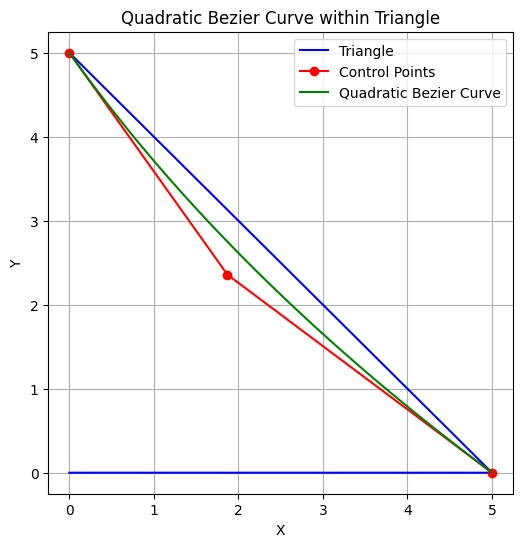

In [19]:
def calc_derivative_bezier(t, control_points):
    p_0, p_1, p_2 = control_points[0], control_points[1], control_points[2]
    derivative = 2 * (1 - t) * (p_1 - p_0) + 2 * t * (p_2 - p_1)
    return derivative

def generate_quadratic_bezier_curve(triangle, control_points, num_samples):
    t = np.linspace(0, 1, num_samples)
    curve_points = []

    for t_val in t:
        # Calculate the quadratic Bezier curve point
        point = (1 - t_val) ** 2 * control_points[0] + 2 * (1 - t_val) * t_val * control_points[1] + t_val ** 2 * control_points[2]
        curve_points.append(point)

    return curve_points

def generate_control_points(triangle):
    base: float = triangle[1][0]
    height: float = triangle[2][1]

    hypo_x = random.uniform(0, base)
    hypo_y = random.uniform(0, height)

    # Checking if the calculated coordinates are within our right-angled triangle or not
    if(0 <= hypo_x <= base and 0 <= hypo_y <= height and (hypo_x / base + hypo_y / height) <= 1):
        return np.array([[BASE, 0], [hypo_x, hypo_y], [0, HEIGHT]])
    else:
        return generate_control_points(triangle)

triangle = np.array([[0, 0], [BASE, 0], [0, HEIGHT]])
control_points = generate_control_points(triangle)
num_points = 100
curve_points = generate_quadratic_bezier_curve(triangle, control_points, num_points)

# Plot the triangle, control points, and curve
plt.figure(figsize=(6, 6))
plt.plot(triangle[:, 0], triangle[:, 1], 'b-', label='Triangle')
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')
curve_x, curve_y = zip(*curve_points)
plt.plot(curve_x, curve_y, 'g-', label='Quadratic Bezier Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Bezier Curve within Triangle')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Generate random control points within the rectangle bounds defined by the width and the height
def random_quadratic_bezier(width: float, height: float):
    p0 = np.random.uniform(0, width), np.random.uniform(0, height)
    p1 = np.random.uniform(0, width), np.random.uniform(0, height)
    p2 = np.random.uniform(0, width), np.random.uniform(0, height)
    return np.array(p0), np.array(p1), np.array(p2)

# Generate random control points inside the right-angled triangle
def random_quadratic_bezier_triangle(triangle):
    p0 = np.random.uniform(0, triangle[1, 0]), np.random.uniform(0, triangle[1, 1])
    p1 = np.random.uniform(0, triangle[2, 0]), np.random.uniform(0, triangle[2, 1])
    p2 = np.random.uniform(min(p0[0], p1[0]), triangle[0, 0]), np.random.uniform(min(p0[1], p1[1]), triangle[0, 1])
    return np.array(p0), np.array(p1), np.array(p2)

def bezier_derivative(t, p0, p1, p2):
    return 2 * (1 - t) * (p1 - p0) + 2 * t * (p2 - p1)

def bezier_arc_length(t, p0, p1, p2):
    derivative = bezier_derivative(t, p0, p1, p2)
    return np.sqrt(1 + np.dot(derivative, derivative))

def calc_time_bezier(width: float, height: float) -> float:
    triangle = np.array([[0, 0], [width, 0], [0, height]])
    p0, p1, p2 = random_quadratic_bezier_triangle(triangle)

    # Estimate the arc length using numerical integration
    arc_length, _ = quad(bezier_arc_length, 0, 1, args=(p0, p1, p2))

    velocity = np.sqrt(2 * GRAVITY * height)
    time = arc_length / velocity

    return time

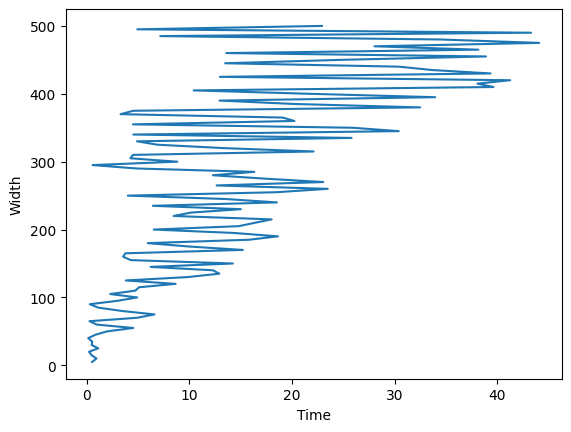

In [22]:
time_list: list[float] = []
width_list: list[float] = []

for i in range(100):
    current_width: float = BASE * (i + 1)
    width_list.append(current_width)
    time_taken: float = calc_time_bezier(current_width, HEIGHT)
    time_list.append(time_taken)

plot_two_val(time_list, width_list, "Time", "Width")

In [ ]:
def calc_second_derivative_bezier(control_points):
    p_0, p_1, p_2 = control_points[0], control_points[1], control_points[2]
    second_derivative = 2 * (p_2 - 2 * p_1 + p_0)
    return second_derivative

In [ ]:
time_list: list[float] = []
points_list = []

# 1. Take random points and append them into a list for cartesian points:- One for the X axis and the other for Y axis -> Control points.
triangle = np.array([[0, 0], [BASE, 0], [0, HEIGHT]])

"""
1. Take random points and append them into 2 lists:- One for X axis and the other for Y axis -> Control point.
2. Take the mean and median of the X axis and Y axis lists and plot the obtained plot.
3. Give the resultant qudratic Bezier curve within Triangle plot.
4. Calculate the curvature of the curve using the Curvature formula.
5. From a built in Bezier curve function, plot the Bezier curve and calculate it\'s curvature.
6. Measure the error from our results and the actual results.
"""

"\n1. Take random points and append them into 2 lists:- One for X axis and the other for Y axis -> Control point.\n2. Take the mean and median of the X axis and Y axis lists and plot the obtained plot.\n3. Give the resultant qudratic Bezier curve within Triangle plot.\n4. Calculate the curvature of the curve using the Curvature formula.\n5. From a built in Bezier curve function, plot the Bezier curve and calculate it's curvature.\n6. Measure the error from our results and the actual results.\n"